<a href="https://colab.research.google.com/github/SuzanaKstro/Passo-a-passo/blob/main/desafio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark
!pip install findspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StructType, StructField, IntegerType, StringType
spark = SparkSession.builder.master("local[*]").getOrCreate()


In [ ]:
df_nov = spark.read \
     .option("header", "true") \
     .option("inferSchema", "true") \
     .csv("/content/PNAD_COVID_112020.csv")

In [ ]:

df_set = spark.read \
     .option("header", "true") \
     .option("inferSchema", "true") \
     .csv("/content/PNAD_COVID_092020.csv")

In [ ]:

df_out = spark.read \
     .option("header", "true") \
     .option("inferSchema", "true") \
     .csv("/content/PNAD_COVID_102020.csv")

In [ ]:
def renomear_colunas(df):
    df = df.withColumnRenamed("V1013", "nr_mes") \
        .withColumnRenamed("B0011", "teve_febre") \
        .withColumnRenamed("B0012", "teve_tosse") \
        .withColumnRenamed("B0013", "teve_garganta") \
        .withColumnRenamed("B0014", "teve_dif_respirar") \
        .withColumnRenamed("B00111", "teve_perda_olfato_paladar") \
        .withColumnRenamed("B011", "medida_contato") \
        .withColumnRenamed("B005", "ficou_internado") \
        .withColumnRenamed("A002", "nr_idade") \
        .withColumnRenamed("A003", "nm_sexo") \
        .withColumnRenamed("A004", "nm_raca") \
        .withColumnRenamed("B002", "procurou_Unidade_saude") \
        .withColumnRenamed("B008", "fez_teste_covid") \
        .withColumnRenamed("D0051", "recebeu_auxilio_emergencial") \
        .withColumnRenamed("A005", "nm_escolaridade") \
        .withColumnRenamed("C007C", "ocupacao_princial") \
        .withColumnRenamed("C007", "esta_empregado") \
        .withColumnRenamed("UF", "id_uf") \
        .withColumnRenamed("B009B", "positivo_swab") \
        .withColumnRenamed("B009D", "positivo_furo") \
        .withColumnRenamed("B009F", "positivo_braco") \
        .withColumnRenamed("B0016", "dor_peito") \
        .withColumnRenamed("B0017", "nausea") \
        .withColumnRenamed("B0019", "fadiga") \
        .withColumnRenamed("B00113", "diarreia") \
        .withColumnRenamed("B00112", "dor_muscular") \
        .withColumnRenamed("B0015", "dor_cabeca") \
        .withColumnRenamed("B0018", "nariaz_entupido") \
        .withColumnRenamed("B0046", "internou_hospital_privado") \
        .withColumnRenamed("B0041", "procurou_posto") \
        .withColumnRenamed("B0021", "procurou_ps_sus") \
        .withColumnRenamed("B0043", "procurou_hospital_sus") \
        .withColumnRenamed("B0045", "procurou_ps_privado") \
        .withColumnRenamed("C011A21", "retirada_produto") \
        .withColumnRenamed("C011A11", "retirada_dinheiro")

    return df

def remover_colunas(df):

    colunas_para_manter = [
        "teve_febre",
        "teve_tosse",
        "teve_garganta",
        "teve_dif_respirar",
        "teve_perda_olfato_paladar",
        "medida_contato",
        "ficou_internado",
        "nr_idade",
        "nm_sexo",
        "nm_raca",
        "procurou_Unidade_saude",
        "fez_teste_covid",
        "recebeu_auxilio_emergencial",
        "ocupacao_princial",
        "esta_empregado",
        "id_uf",
        "positivo_swab",
        "positivo_furo",
        "positivo_braco",
        "nausea",
        "fadiga",
        "diarreia",
        "dor_muscular",
        "dor_cabeca",
        "nariaz_entupido",
        "internou_hospital_privado",
        "procurou_posto",
        "procurou_ps_sus",
        "procurou_hospital_sus",
        "procurou_ps_privado",
        "retirada_dinheiro",
        "retirada_produto"
    ]


    colunas_existentes = [col for col in colunas_para_manter if col in df.columns]
    df = df.select(*colunas_existentes)

    return df



In [ ]:

spark = SparkSession.builder.appName("desafio").getOrCreate()

In [ ]:
df_set_renomeado = renomear_colunas(df_set)


In [ ]:
df_out_renomeado = renomear_colunas(df_out)


In [ ]:
df_nov_renomeado = renomear_colunas(df_nov)


In [ ]:
df_set_reduzido = remover_colunas(df_set_renomeado)


In [ ]:
df_out_reduzido = remover_colunas(df_out_renomeado)


In [ ]:
df_nov_reduzido = remover_colunas(df_nov_renomeado)


In [ ]:
df_unido_positivos.count()

1149197

In [ ]:
from pyspark.sql import functions as F

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


<ipython-input-63-99efc152d5f3>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x="count", y="nome_estado", data=df_total_positivos_estado_pd, palette="Blues_d")


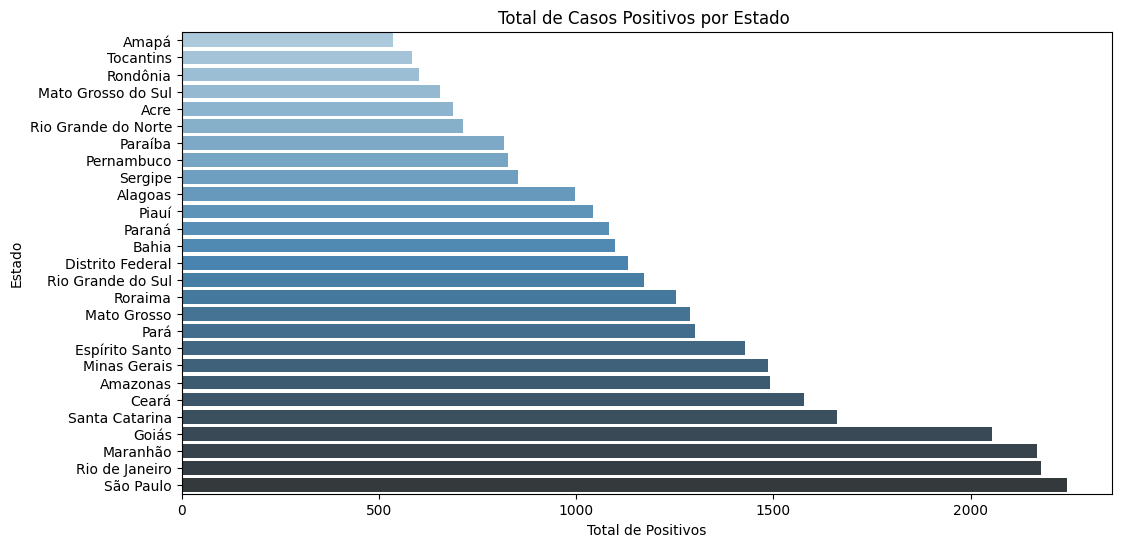

In [ ]:
df_unido_positivos = df_unido.filter(
    (F.col("positivo_swab") == 1) |
    (F.col("positivo_furo") == 1) |
    (F.col("positivo_braco") == 1)
)


dados_estados = [
    (11, "Rondônia"), (12, "Acre"), (13, "Amazonas"), (14, "Roraima"), (15, "Pará"),
    (16, "Amapá"), (17, "Tocantins"), (21, "Maranhão"), (22, "Piauí"), (23, "Ceará"),
    (24, "Rio Grande do Norte"), (25, "Paraíba"), (26, "Pernambuco"), (27, "Alagoas"),
    (28, "Sergipe"), (29, "Bahia"), (31, "Minas Gerais"), (32, "Espírito Santo"),
    (33, "Rio de Janeiro"), (35, "São Paulo"), (41, "Paraná"), (42, "Santa Catarina"),
    (43, "Rio Grande do Sul"), (50, "Mato Grosso do Sul"), (51, "Mato Grosso"),
    (52, "Goiás"), (53, "Distrito Federal")
]


schema_estados = ["id_uf", "nome_estado"]
df_estados = spark.createDataFrame(dados_estados, schema=schema_estados)


df_unido_positivos_estados = df_unido_positivos.join(df_estados, on="id_uf", how="left")


df_total_positivos_estado = df_unido_positivos_estados.groupBy("nome_estado").count()


df_total_positivos_estado_pd = df_total_positivos_estado.toPandas()


df_total_positivos_estado_pd = df_total_positivos_estado_pd.sort_values(by="count", ascending=True)


plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x="count", y="nome_estado", data=df_total_positivos_estado_pd, palette="Blues_d")


plt.title("Total de Casos Positivos por Estado ")
plt.xlabel("Total de Positivos")
plt.ylabel("Estado")


plt.show()

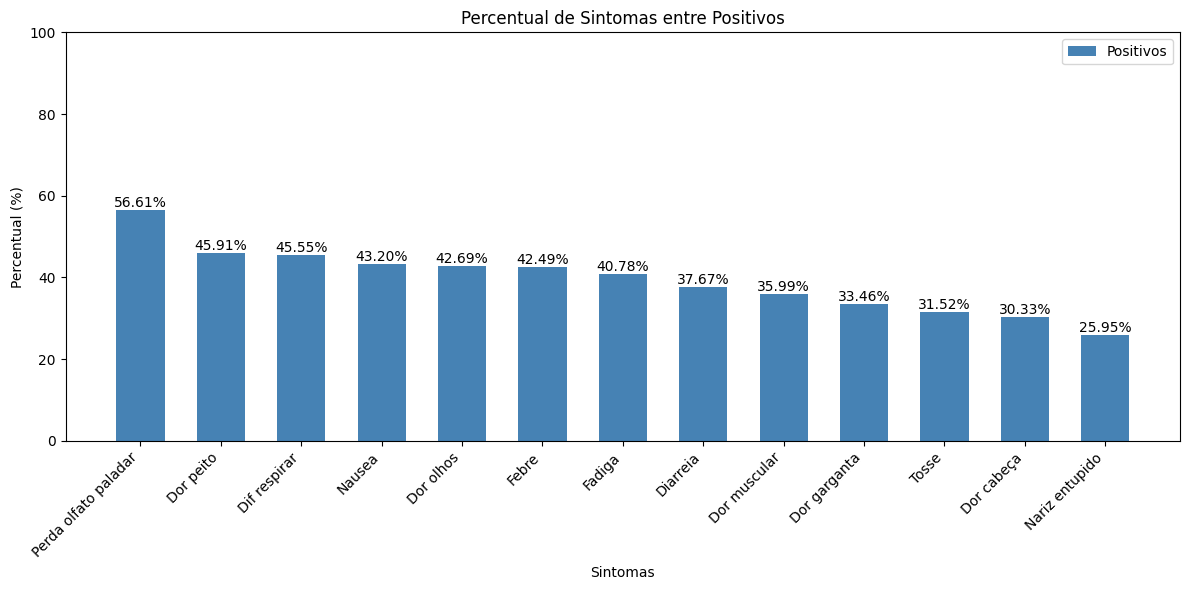

In [ ]:


sintomas = [
    "Perda olfato paladar", "Dor peito", "Dif respirar", "Nausea",
    "Dor olhos", "Febre", "Fadiga", "Diarreia", "Dor muscular",
    "Dor garganta", "Tosse", "Dor cabeça", "Nariz entupido"
]
percentual_positivos = [
    56.61, 45.91, 45.55, 43.20, 42.69, 42.49, 40.78,
    37.67, 35.99, 33.46, 31.52, 30.33, 25.95
]

x = np.arange(len(sintomas))
largura = 0.6
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x, percentual_positivos, largura, color='steelblue', label='Positivos')

ax.set_ylabel('Percentual (%)')
ax.set_xlabel('Sintomas')
ax.set_title('Percentual de Sintomas entre Positivos')
ax.set_xticks(x)
ax.set_xticklabels(sintomas, rotation=45, ha="right")
ax.set_ylim(0, 100)
ax.legend()

for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')


plt.tight_layout()
plt.show()

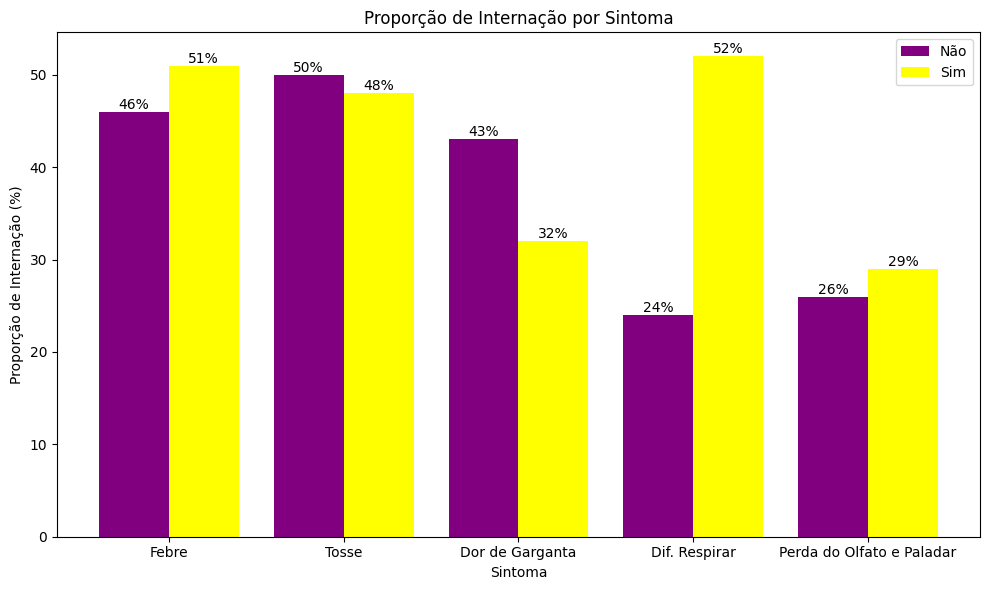

In [ ]:


sintomas = ["Febre", "Tosse", "Dor de Garganta", "Dif. Respirar", "Perda do Olfato e Paladar"]
internacao_sim = [51, 48, 32, 52, 29]  # Percentual para "Sim"
internacao_nao = [46, 50, 43, 24, 26]  # Percentual para "Não"

x = range(len(sintomas))

fig, ax = plt.subplots(figsize=(10, 6))
largura = 0.4

rects_nao = ax.bar([pos - largura / 2 for pos in x], internacao_nao, largura, label='Não', color='purple')
rects_sim = ax.bar([pos + largura / 2 for pos in x], internacao_sim, largura, label='Sim', color='yellow')

ax.set_xlabel("Sintoma")
ax.set_ylabel("Proporção de Internação (%)")
ax.set_title("Proporção de Internação por Sintoma")
ax.set_xticks(x)
ax.set_xticklabels(sintomas)
ax.legend()

for rect in rects_nao + rects_sim:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.0f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()




<ipython-input-94-c4934a9cbaf7>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')


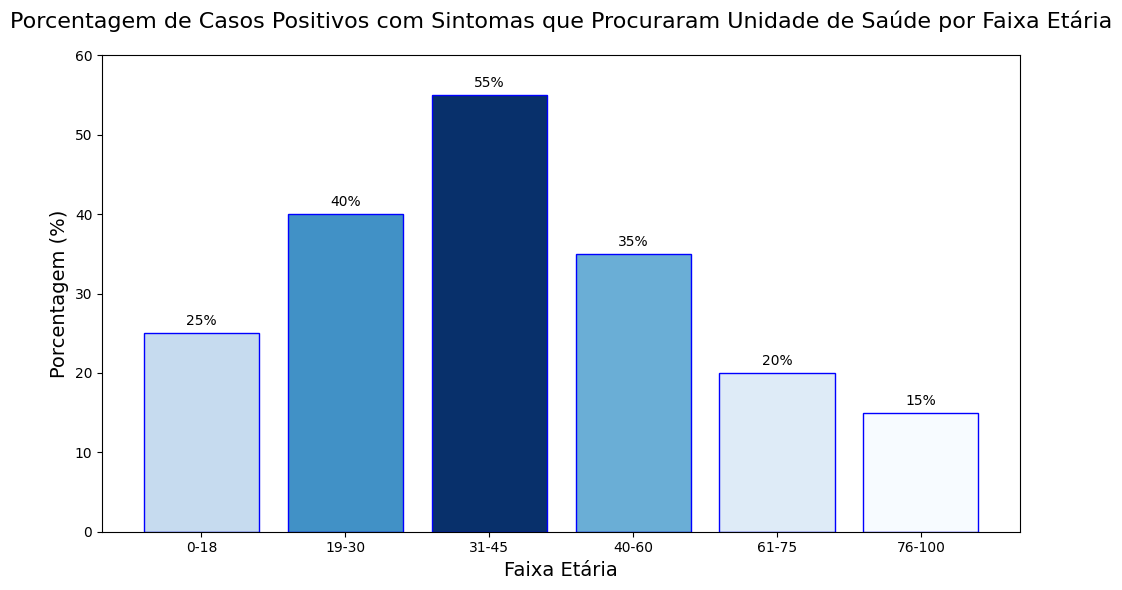

In [ ]:



faixas_etarias = ["0-18", "19-30", "31-45", "40-60", "61-75", "76-100"]
percentual_procuraram_saude = [25, 40, 55, 35, 20, 15]


norm = plt.Normalize(min(percentual_procuraram_saude), max(percentual_procuraram_saude))
cmap = cm.get_cmap('Blues')
colors = cmap(norm(percentual_procuraram_saude))


fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(faixas_etarias, percentual_procuraram_saude, color=colors, edgecolor='blue')


plt.title("Porcentagem de Casos Positivos com Sintomas que Procuraram Unidade de Saúde por Faixa Etária", fontsize=16, pad=20)
plt.xlabel("Faixa Etária", fontsize=14)
plt.ylabel("Porcentagem (%)", fontsize=14)
plt.ylim(0, 60)  # Ajuste do limite do eixo Y


for i, valor in enumerate(percentual_procuraram_saude):
    plt.text(i, valor + 1, f"{valor}%", ha='center', fontsize=10)


plt.tight_layout()
plt.show()


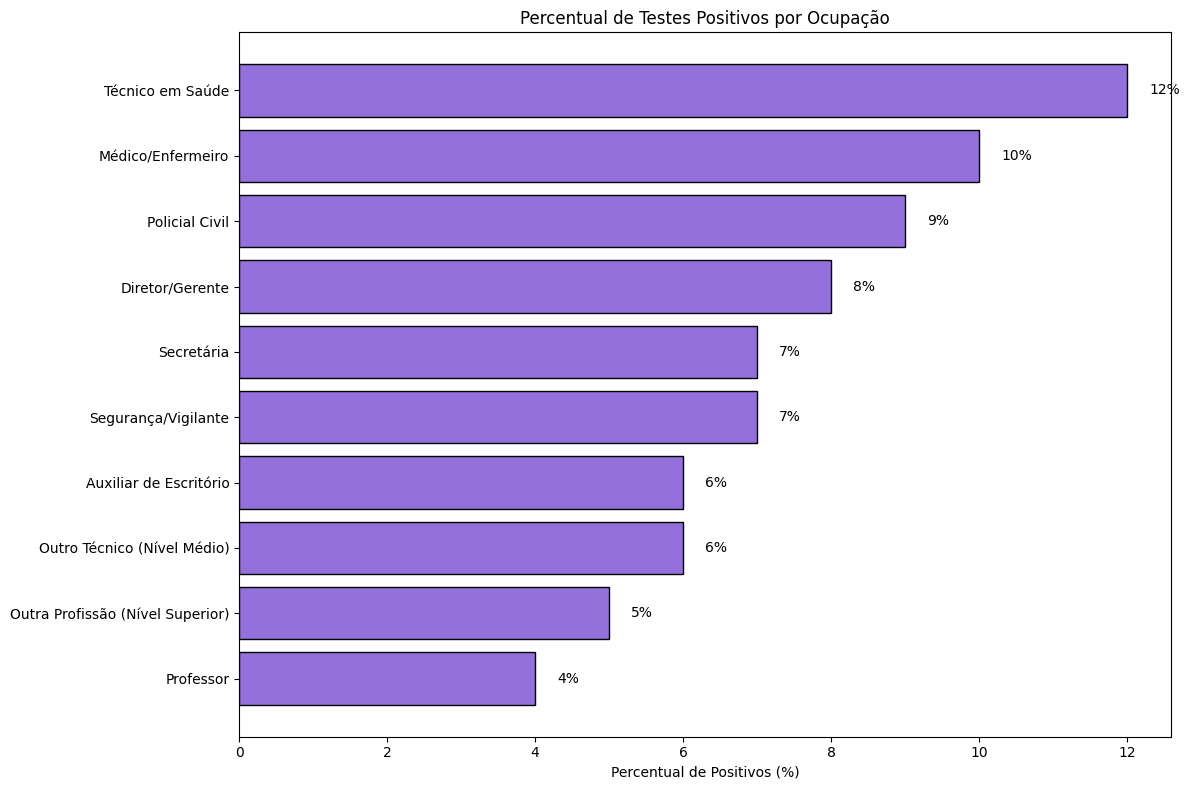

In [ ]:

ocupacoes = [
    "Técnico em Saúde", "Médico/Enfermeiro", "Policial Civil",
    "Diretor/Gerente", "Secretária", "Segurança/Vigilante",
    "Auxiliar de Escritório", "Outro Técnico (Nível Médio)",
    "Outra Profissão (Nível Superior)", "Professor"
]
percentuais = [12, 10, 9, 8, 7, 7, 6, 6, 5, 4]

x = np.arange(len(ocupacoes))
fig, ax = plt.subplots(figsize=(12, 8))


bars = ax.barh(x, percentuais, color='mediumpurple', edgecolor='black')


for i, bar in enumerate(bars):
    ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height() / 2,
            f'{percentuais[i]}%', va='center', ha='left', fontsize=10)


ax.set_yticks(x)
ax.set_yticklabels(ocupacoes)
ax.set_xlabel('Percentual de Positivos (%)')
ax.set_title('Percentual de Testes Positivos por Ocupação')
ax.invert_yaxis()


plt.tight_layout()
plt.show()



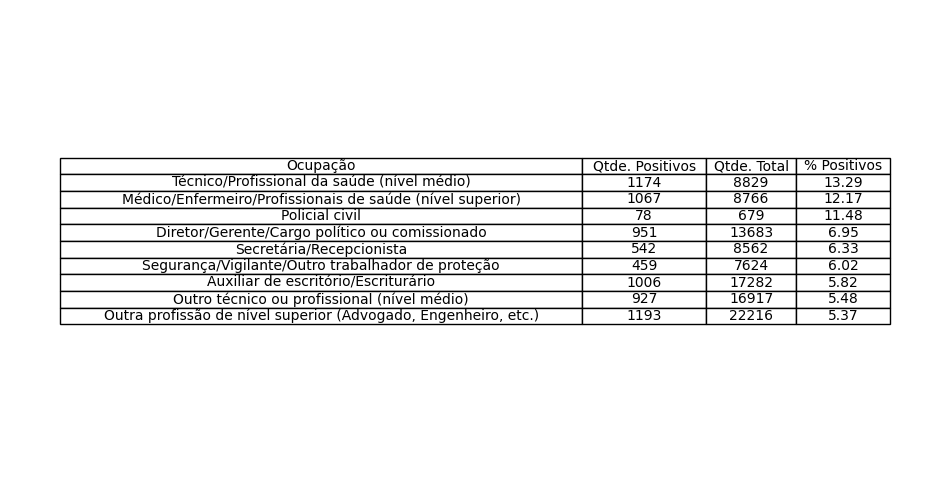

In [ ]:
import pandas as pd
data = {
    "Ocupação": [
        "Técnico/Profissional da saúde (nível médio)",
        "Médico/Enfermeiro/Profissionais de saúde (nível superior)",
        "Policial civil",
        "Diretor/Gerente/Cargo político ou comissionado",
        "Secretária/Recepcionista",
        "Segurança/Vigilante/Outro trabalhador de proteção",
        "Auxiliar de escritório/Escriturário",
        "Outro técnico ou profissional (nível médio)",
        "Outra profissão de nível superior (Advogado, Engenheiro, etc.)"
    ],
    "Qtde. Positivos": [1174, 1067, 78, 951, 542, 459, 1006, 927, 1193],
    "Qtde. Total": [8829, 8766, 679, 13683, 8562, 7624, 17282, 16917, 22216],
    "% Positivos": [13.29, 12.17, 11.48, 6.95, 6.33, 6.02, 5.82, 5.48, 5.37]
}


df = pd.DataFrame(data)


fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))


plt.show()




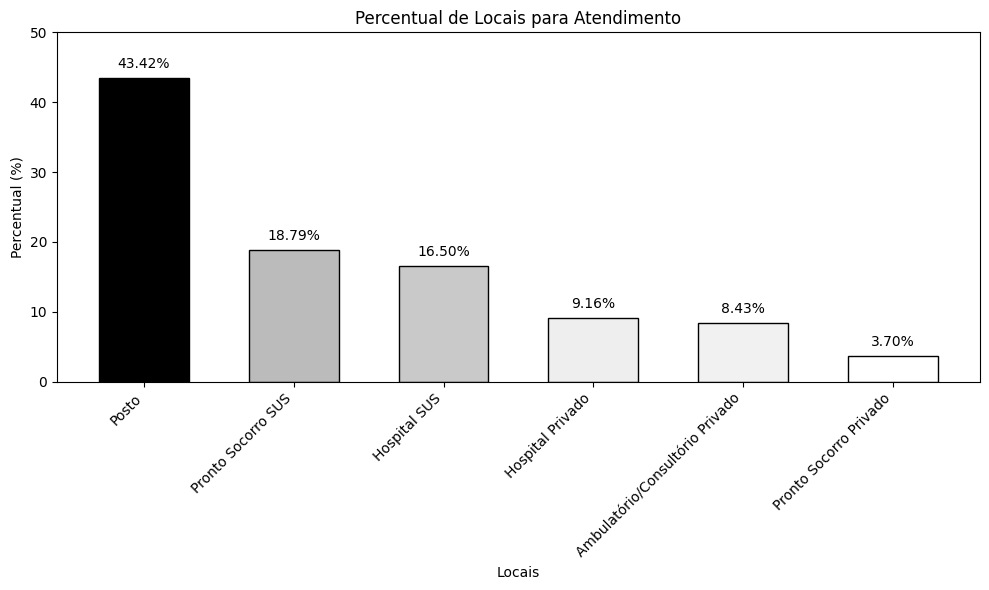

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib import cm


locais = [
    "Posto", "Pronto Socorro SUS", "Hospital SUS",
    "Hospital Privado", "Ambulatório/Consultório Privado",
    "Pronto Socorro Privado"
]
percentuais = [43.42, 18.79, 16.50, 9.16, 8.43, 3.70]


norm = Normalize(vmin=min(percentuais), vmax=max(percentuais))
cmap = cm.Greys


x = np.arange(len(locais))
largura = 0.6

fig, ax = plt.subplots(figsize=(10, 6))


for i, percentual in enumerate(percentuais):
    cor = cmap(norm(percentual))
    ax.bar(x[i], percentual, largura, color=cor, edgecolor='black')


ax.set_ylabel('Percentual (%)')
ax.set_xlabel('Locais')
ax.set_title('Percentual de Locais para Atendimento')
ax.set_xticks(x)
ax.set_xticklabels(locais, rotation=45, ha="right")
ax.set_ylim(0, 50)


for i, percentual in enumerate(percentuais):
    ax.text(i, percentual + 1, f'{percentual:.2f}%', ha='center', va='bottom')


plt.tight_layout()
plt.show()
